## ***Sub-problem 5:*** Correlation between the general climate of a county with the health of its population and availability of pharmacies.

Get Files

In [1]:
!wget -nc https://raw.githubusercontent.com/ravi-raj-97/big_data_pharmacy_county/main/Pharmacy-County.xlsx
!wget -nc https://raw.githubusercontent.com/ravi-raj-97/big_data_pharmacy_county/main/Demography_USA.xlsx
# !wget -nc https://raw.githubusercontent.com/ravi-raj-97/big_data_pharmacy_county/ashish/uszips.csv

--2022-05-09 20:44:27--  https://raw.githubusercontent.com/ravi-raj-97/big_data_pharmacy_county/main/Pharmacy-County.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2173314 (2.1M) [application/octet-stream]
Saving to: ‘Pharmacy-County.xlsx’

Pharmacy-County.xls 100%[===================>]   2.07M  --.-KB/s    in 0.03s   

2022-05-09 20:44:28 (71.2 MB/s) - ‘Pharmacy-County.xlsx’ saved [2173314/2173314]

--2022-05-09 20:44:28--  https://raw.githubusercontent.com/ravi-raj-97/big_data_pharmacy_county/main/Demography_USA.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request

Form dataframes

In [2]:
import pandas as pd

In [3]:
pharmacy_county=pd.ExcelFile("Pharmacy-County.xlsx")
demography_usa=pd.ExcelFile("Demography_USA.xlsx")

In [4]:
pharmacy_county.sheet_names[0:5]

['Alaska', 'Arkansas', 'California', 'Colarado', 'Connecticut']

In [5]:
demography_usa.sheet_names[:6]

['Demography USA', 'Population', 'Housing', 'Households', 'Ages', 'Genders']

In [6]:
pharmacy_county_statewise={}

for state in pharmacy_county.sheet_names:
  pharmacy_county_statewise[state]=pd.io.excel.ExcelFile.parse(pharmacy_county, state).drop(0)

In [7]:
pharmacy_county_statewise.keys()

dict_keys(['Alaska', 'Arkansas', 'California', 'Colarado', 'Connecticut', 'Delaware', 'Flordia', 'Hawaii', 'Idaho', 'Kansas', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey', 'North Carolina', 'North Dakota', 'Oklahoma', 'Oregon', 'Rhode island', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Wisconsin', 'Other State'])

In [8]:
demography_usa_categories={}

demography_usa_categories['Climate']=pd.io.excel.ExcelFile.parse(demography_usa, 'Demography USA')
demography_usa_categories['Population']=pd.io.excel.ExcelFile.parse(demography_usa, 'Population')
demography_usa_categories['Diseases']=pd.io.excel.ExcelFile.parse(demography_usa, 'Diseases')

In [9]:
demography_usa_categories.keys()

dict_keys(['Climate', 'Population', 'Diseases'])



---

## 1. Correlation between the general climate of a county with the health of its population

In [10]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Create joined dataframe and splitting into test and train sets

In [11]:
print(demography_usa_categories['Diseases'].shape)
print(demography_usa_categories['Climate'].shape)

(3219, 16)
(3219, 12)


In [12]:
demography_disease_climate=demography_usa_categories['Diseases'].merge(demography_usa_categories['Climate'],on=['OBJECTID'],how='inner',suffixes=('', '_y'))
demography_disease_climate.drop(demography_disease_climate.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [13]:
demography_disease_climate.shape

(3219, 23)

In [14]:
demography_disease_climate['IECC_Zone']=demography_disease_climate['IECC Climate Zone'].astype(str)+demography_disease_climate['IECC Moisture Regime']

In [18]:
demography_disease_climate.dropna()
demography_disease_climate.shape

(3219, 24)

In [19]:
demography_disease_climate_train,demography_disease_climate_test=train_test_split(demography_disease_climate,train_size=0.7)

In [20]:
print(demography_disease_climate_train.shape)
print(demography_disease_climate_test.shape)

(2253, 24)
(966, 24)


Preprocess

In [21]:
feature_columns=['Prevalence of obesity', 'Hypertension', 'Diabetes', 'CVD', 'HIV/AIDS', 'cvd_100k', 'hypertension_100k']
class_columns=['IECC_Zone']#,'IECC Climate Zone', 'IECC Moisture Regime', 'BA Climate Zone', 'Temp']

In [22]:
x_train=demography_disease_climate_train[feature_columns].values
x_test=demography_disease_climate_test[feature_columns].values

y_train=demography_disease_climate_train[class_columns].apply(lambda col: pd.factorize(col, sort=True)[0]).values
y_test=demography_disease_climate_test[class_columns].apply(lambda col: pd.factorize(col, sort=True)[0]).values

In [23]:
y_train

array([[11],
       [12],
       [ 7],
       ...,
       [ 1],
       [ 7],
       [ 6]])

Correlation Heatmap

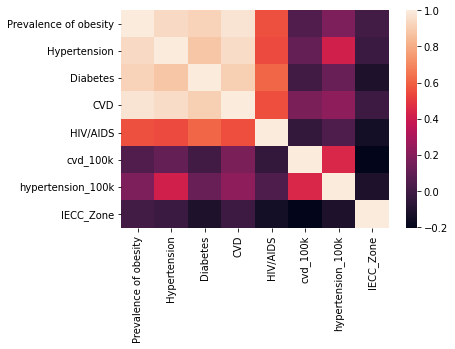

In [34]:
import seaborn as sns
%matplotlib inline
columns=['Prevalence of obesity', 'Hypertension', 'Diabetes', 'CVD', 'HIV/AIDS', 'cvd_100k', 'hypertension_100k', 'IECC_Zone']
demography_disease_climate_corr = demography_disease_climate[columns].apply(lambda col: pd.factorize(col, sort=True)[0]).corr()
sns.heatmap(demography_disease_climate_corr, 
        xticklabels=columns,
        yticklabels=columns)

Using SVM

In [ ]:
result_string=[]
for k in range(1,len(feature_columns)+1):
  svm = make_pipeline(StandardScaler(), PCA(n_components=k), SVC(gamma='auto'),)
  _=svm.fit(x_train,y_train.ravel())
  score=svm.score(x_test,y_test.ravel())
  result_string.append(f"num_features = {k} : {score}")

In [ ]:
for result in result_string:
  print(result)

num_features = 1 : 0.2329192546583851
num_features = 2 : 0.2587991718426501
num_features = 3 : 0.3250517598343685
num_features = 4 : 0.37267080745341613
num_features = 5 : 0.36438923395445133
num_features = 6 : 0.35714285714285715
num_features = 7 : 0.34886128364389235


Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
svm = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_features=4))
_=svm.fit(x_train,y_train)
score=svm.score(x_test,y_test)

In [ ]:
print(score)

0.30745341614906835


In [ ]:
max_score=0
depth=1
for k in range(1,100):
  tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=k))
  _=tree.fit(x_train,y_train)
  score=tree.score(x_test,y_test)
  if score>max_score:
    max_score=score
    depth=k
print(f"depth = {depth} : score = {max_score}")

depth = 7 : score = 0.3581780538302277


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_score=0
depth=1
for k in range(1,len(feature_columns)+1):
  tree = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=k))
  _=tree.fit(x_train,y_train.ravel())
  score=tree.score(x_test,y_test.ravel())
  if score>max_score:
    max_score=score
    depth=k
print(f"depth = {depth} : score = {max_score}")

depth = 7 : score = 0.38716356107660455


Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
max_score=0
num_features=1
for k in range(1,len(feature_columns)+1):
  nn = make_pipeline(StandardScaler(), PCA(n_components=k), MLPClassifier(random_state=1, max_iter=10000))
  _=nn.fit(x_train,y_train.ravel())
  score=nn.score(x_test,y_test.ravel())
  if score>max_score:
    max_score=score
    num_features=k
print(f"num_features = {num_features} : score = {max_score}")

num_features = 5 : score = 0.41200828157349895


Conclusion:

*Using various classifiers, a maximum test score of 41.2% could be achieved which indicates that there is weak or no correlation between thee health of the county and the climate*

---

## 2. Correlation between Climate of the county and number of pharmacies

In [35]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Create joined dataframe and splitting into test and train sets

In [36]:
print(pharmacy_county_statewise['Alaska'].shape)
print(demography_usa_categories['Climate'].shape)

(121, 6)
(3219, 12)


In [37]:
states_with_county_info = ['Alaska', 'Arkansas', 'California', 'Hawaii', 'Idaho', 'Maine', 'Missouri', 'Montana',
 'Nebraska', 'North Carolina', 'Oregon', 'Rhode island', 'Texas']

In [38]:
for state in states_with_county_info:
  pharmacy_county_statewise[state]['county']=pharmacy_county_statewise[state]['county'].str.lower()

In [39]:
for state in states_with_county_info:
  for ix in pharmacy_county_statewise[state].index:
      county_name = pharmacy_county_statewise[state].loc[ix]['county']
      if ' city and borough' in county_name:
          county_name_new = county_name.replace(' city and borough', '')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)
      elif ' county' in county_name:
          county_name_new = county_name.replace(' county', '')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)
      elif ' borough' in county_name:
          county_name_new = county_name.replace(' borough','')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)
      elif ' municipality' in county_name:
          county_name_new = county_name.replace(' municipality','')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)
      elif ' city' in county_name:
          county_name_new = county_name.replace(' city','')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)
      elif ' census area' in county_name:
          county_name_new = county_name.replace(' census area','')
          pharmacy_county_statewise[state]['county'] = pharmacy_county_statewise[state]['county'].replace(county_name, county_name_new)

In [40]:
pharmacy_county_statewise['Texas'].groupby(by='county').agg('count')['State']

county
anderson     7
andrews      3
angelina    13
aransas      4
archer       1
            ..
wood         9
yoakum       2
young        5
zapata       2
zavala       2
Name: State, Length: 225, dtype: int64

In [41]:
num_pharmacy_county_wise=[]

for state in states_with_county_info:
  num_pharmacy_county=pharmacy_county_statewise[state].groupby(by='county').agg('count')['State']
  for county in num_pharmacy_county.keys():
    num_pharmacy_county_wise.append([state,county,num_pharmacy_county[county]])

num_pharmacy_county_wise=pd.DataFrame(num_pharmacy_county_wise, columns=["STATE_NAME","County Name","Num_Pharmacies"])

In [42]:
num_pharmacy_county_wise

STATE_NAME           County Name  Num_Pharmacies
0       Alaska             anchorage              51
1       Alaska    city and of juneau               1
2       Alaska            dillingham               1
3       Alaska  fairbanks north star              13
4       Alaska                haines               1
..         ...                   ...             ...
805      Texas                  wood               9
806      Texas                yoakum               2
807      Texas                 young               5
808      Texas                zapata               2
809      Texas                zavala               2

[810 rows x 3 columns]

In [43]:
demography_usa_categories['Climate']['County Name']=demography_usa_categories['Climate']['County Name'].str.lower()

In [44]:
pharmacy_count_climate=pd.merge(demography_usa_categories['Climate'],num_pharmacy_county_wise,on=['STATE_NAME','County Name'],suffixes=('', '_y'))
# demography_usa_categories['Climate'].merge(num_pharmacy_county_wise,on=['OBJECTID'],how='inner',suffixes=('', '_y'))
pharmacy_count_climate.drop(pharmacy_count_climate.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [45]:
pharmacy_count_climate

OBJECTID                  NAME           County Name STATE_NAME State  \
0        2958             Anchorage             anchorage     Alaska    AK   
1        3179                Haines                haines     Alaska    AK   
2        3181                Juneau                juneau     Alaska    AK   
3        3184  Fairbanks North Star  fairbanks north star     Alaska    AK   
4        3194     Matanuska-Susitna     matanuska-susitna     Alaska    AK   
..        ...                   ...                   ...        ...   ...   
793      3129               Cameron               cameron      Texas    TX   
794      3131             Matagorda             matagorda      Texas    TX   
795      3153                Nueces                nueces      Texas    TX   
796      3157               Aransas               aransas      Texas    TX   
797      3161               Calhoun               calhoun      Texas    TX   

     STATE_FIPS  CNTY_FIPS   FIPS  IECC Climate Zone IECC Moisture Regime  \
0             2         20   2020                  7                  NaN   
1             2        100   2100                  7                  NaN   
2             2        110   2110                  7                  NaN   
3             2         90   2090                  8                  NaN   
4             2        170   2170                  7                  NaN   
..          ...        ...    ...                ...                  ...   
793          48         61  48061                  2                    A   
794          48        321  48321                  2                    A   
795          48        355  48355                  2                    A   
796          48          7  48007                  2                    A   
797          48         57  48057                  2                    A   

    BA Climate Zone          Temp  Num_Pharmacies  
0         Very Cold   1733.300624              51  
1         Very Cold   2367.380199               1  
2         Very Cold   2761.022564               6  
3         Subarctic   7435.314794              13  
4         Very Cold  24976.167683               9  
..              ...           ...             ...  
793       Hot-Humid    949.719526              73  
794       Hot-Humid   1140.332862               8  
795       Hot-Humid    844.128000              55  
796       Hot-Humid    263.740586               4  
797       Hot-Humid    544.774106               4  

[798 rows x 13 columns]

In [46]:
pharmacy_count_climate['IECC_Zone']=pharmacy_count_climate['IECC Climate Zone'].astype(str)+pharmacy_count_climate['IECC Moisture Regime']

In [47]:
pharmacy_count_climate=pharmacy_count_climate.dropna()
pharmacy_count_climate

OBJECTID       NAME County Name STATE_NAME State  STATE_FIPS  CNTY_FIPS  \
19        703   Cleburne    cleburne   Arkansas    AR           5         23   
20        929      Boone       boone   Arkansas    AR           5          9   
21        936      Cross       cross   Arkansas    AR           5         37   
22       1285     Searcy      searcy   Arkansas    AR           5        129   
23       1307   Columbia    columbia   Arkansas    AR           5         27   
..        ...        ...         ...        ...   ...         ...        ...   
793      3129    Cameron     cameron      Texas    TX          48         61   
794      3131  Matagorda   matagorda      Texas    TX          48        321   
795      3153     Nueces      nueces      Texas    TX          48        355   
796      3157    Aransas     aransas      Texas    TX          48          7   
797      3161    Calhoun     calhoun      Texas    TX          48         57   

      FIPS  IECC Climate Zone IECC Moisture Regime BA Climate Zone  \
19    5023                  3                    A     Mixed-Humid   
20    5009                  4                    A     Mixed-Humid   
21    5037                  3                    A     Mixed-Humid   
22    5129                  4                    A     Mixed-Humid   
23    5027                  3                    A       Hot-Humid   
..     ...                ...                  ...             ...   
793  48061                  2                    A       Hot-Humid   
794  48321                  2                    A       Hot-Humid   
795  48355                  2                    A       Hot-Humid   
796  48007                  2                    A       Hot-Humid   
797  48057                  2                    A       Hot-Humid   

            Temp  Num_Pharmacies IECC_Zone  
19    591.920155               7        3A  
20    601.756172               7        4A  
21    622.348691               5        3A  
22    668.532626               2        4A  
23    766.630310               5        3A  
..           ...             ...       ...  
793   949.719526              73        2A  
794  1140.332862               8        2A  
795   844.128000              55        2A  
796   263.740586               4        2A  
797   544.774106               4        2A  

[778 rows x 14 columns]

In [48]:
pharmacy_count_climate_train,pharmacy_count_climate_test=train_test_split(pharmacy_count_climate,train_size=0.7)

In [49]:
print(pharmacy_count_climate_train.shape)
print(pharmacy_count_climate_test.shape)

(544, 14)
(234, 14)


Preprocess

In [50]:
feature_columns=['Num_Pharmacies']
class_columns=['IECC_Zone']#,'IECC Climate Zone', 'IECC Moisture Regime', 'BA Climate Zone', 'Temp']

In [51]:
x_train=pharmacy_count_climate_train[feature_columns].values
x_test=pharmacy_count_climate_test[feature_columns].values

y_train=pharmacy_count_climate_train[class_columns].apply(lambda col: pd.factorize(col, sort=True)[0]).values
y_test=pharmacy_count_climate_test[class_columns].apply(lambda col: pd.factorize(col, sort=True)[0]).values

Correlation Heatmap

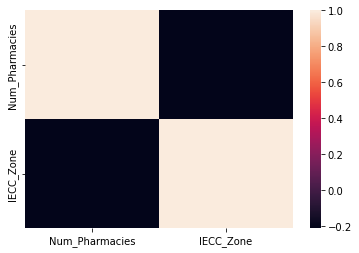

In [52]:
import seaborn as sns
%matplotlib inline
columns=['Num_Pharmacies', 'IECC_Zone']
pharmacy_count_climate_corr = pharmacy_count_climate[columns].apply(lambda col: pd.factorize(col, sort=True)[0]).corr()
sns.heatmap(pharmacy_count_climate_corr, 
        xticklabels=columns,
        yticklabels=columns)

Decision Trees

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
svm = make_pipeline(StandardScaler(), DecisionTreeClassifier())
_=svm.fit(x_train,y_train)
score=svm.score(x_test,y_test)

In [143]:
print(score)

0.1794871794871795


In [144]:
max_score=0
depth=1
for k in range(1,100):
  tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=k))
  _=tree.fit(x_train,y_train)
  score=tree.score(x_test,y_test)
  if score>max_score:
    max_score=score
    depth=k
print(f"depth = {depth} : score = {max_score}")

depth = 2 : score = 0.23504273504273504


Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
max_score=0
depth=1
for k in range(1,len(feature_columns)+1):
  tree = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=k))
  _=tree.fit(x_train,y_train.ravel())
  score=tree.score(x_test,y_test.ravel())
  if score>max_score:
    max_score=score
    depth=k
print(f"depth = {depth} : score = {max_score}")

depth = 1 : score = 0.2264957264957265


Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train.ravel())
clf.score(x_test,y_test.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.2222222222222222

```Logistic regression classifier fails to converge```

Conclusion:

*Using various classifiers, a maximum test score of 23.5% could be achieved which indicates that there is weak or no correlation between thee number of pharmacies in a county and its climate*